Teleconnection class can be directly imported from the module teleconnections

In [1]:
from teleconnections.tc_class import Teleconnection

FDB5 binary library not present on system, disabling FDB support.


A teleconnection class instance will open data from a Reader instance, with details about the teleconnection we want to study. The teleconnection class will then compute the teleconnection index, and plot the results.

In [2]:
telec = Teleconnection(model='ERA5', exp='era5', source='monthly',
                       telecname='NAO', loglevel='DEBUG', savefig=False, savefile=False)

2023-06-28 15:41:58 :: Teleconnection :: DEBUG    -> Open dataset: ERA5/era5/monthly
2023-06-28 15:41:58 :: Teleconnection :: DEBUG    -> Regridding resolution: r100
2023-06-28 15:41:58 :: Teleconnection :: INFO     -> Namelist loaded
2023-06-28 15:41:58 :: Teleconnection :: DEBUG    -> {'NAO': {'telec_type': 'station', 'field': 'msl', 'grib_code': 151, 'lat1': 37.7, 'lon1': -25.7, 'lat2': 64.1, 'lon2': -22}, 'ENSO': {'telec_type': 'region', 'field': 'sst', 'grib_code': 151159, 'latN': 5, 'lonW': -170, 'latS': -5, 'lonE': -120}}
2023-06-28 15:41:58 :: Teleconnection :: DEBUG    -> Teleconnection variable: msl
2023-06-28 15:41:58 :: Teleconnection :: DEBUG    -> Teleconnection type: station
2023-06-28 15:42:00 :: Teleconnection :: INFO     -> Reader initialized


In [3]:
telec.retrieve()

2023-06-28 15:27:15 :: Reader :: INFO     -> Retrieving variables: ['msl']
2023-06-28 15:27:15 :: Reader :: DEBUG    -> Variables in the fixes: {'msl': {'grib': True, 'source': 'MSL'}, 'sst': {'grib': True, 'source': 'SSTK'}, '2t': {'grib': True, 'source': 'T2M'}}
2023-06-28 15:27:16 :: Reader :: INFO     -> msl: Pa --> Pa
2023-06-28 15:27:16 :: Teleconnection :: INFO     -> Data retrieved
2023-06-28 15:27:16 :: Reader :: DEBUG    -> Grouping variables that share the same dimension
2023-06-28 15:27:16 :: Reader :: DEBUG    -> Vert coord: ['2d', '2dm']
2023-06-28 15:27:16 :: Reader :: DEBUG    -> masked_att: None
2023-06-28 15:27:16 :: Reader :: DEBUG    -> masked_vars: ['sst', 'SSTK']
2023-06-28 15:27:16 :: Teleconnection :: INFO     -> Data regridded


In [4]:
telec.data

<xarray.Dataset>
Dimensions:  (time: 996, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    msl      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

Index is evaluated with the method evaluate_index, and plotted with the method plot_index.
The function to be used to evaluate the index is automatically selected based on the teleconnection name.

In [5]:
telec.evaluate_index()

2023-06-28 15:27:16 :: station based index :: INFO     -> Evaluating station based index for NAO
/work/bb1153/b382289/mambaforge/envs/teleconnections/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 83 times more chunks
  return self.array[key]
2023-06-28 15:27:16 :: station based index :: INFO     -> Data longitudes are 0-360, converting teleconnection coords
2023-06-28 15:27:16 :: station based index :: INFO     -> Station 1: lon = 334.3, lat = 37.7
2023-06-28 15:27:16 :: station based index :: INFO     -> Station 2: lon = 338, lat = 64.1
2023-06-28 15:27:17 :: station based index :: DEBUG    -> Dropping NaNs
2023-06-28 15:27:48 :: station based index :: INFO     -> Index evaluated


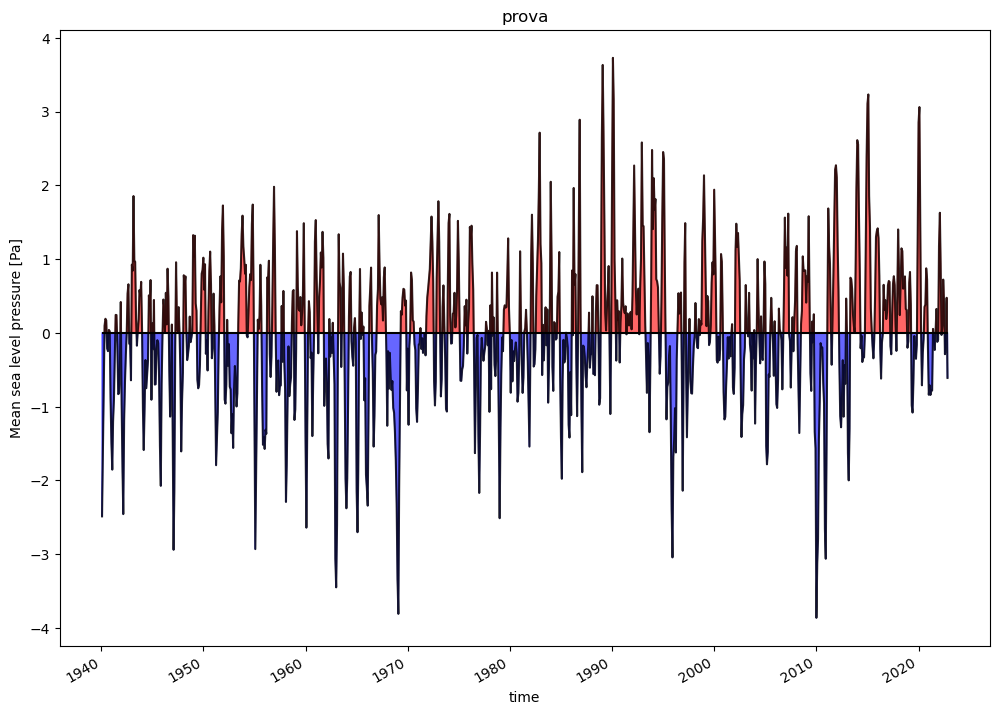

In [6]:
telec.plot_index(title='prova') #**kwargs are passed to plot functions

In [3]:
telec.evaluate_regression()

2023-06-28 15:42:00 :: Teleconnection :: WARNING  -> No index has been calculated, trying to calculate
2023-06-28 15:42:00 :: Teleconnection :: WARNING  -> No retrieve has been performed, trying to retrieve
2023-06-28 15:42:00 :: Reader :: INFO     -> Retrieving variables: ['msl']
2023-06-28 15:42:00 :: Reader :: DEBUG    -> Variables in the fixes: {'msl': {'grib': True, 'source': 'MSL'}, 'sst': {'grib': True, 'source': 'SSTK'}, '2t': {'grib': True, 'source': 'T2M'}}
2023-06-28 15:42:00 :: Reader :: INFO     -> msl: Pa --> Pa
2023-06-28 15:42:00 :: Teleconnection :: INFO     -> Data retrieved
2023-06-28 15:42:00 :: Reader :: DEBUG    -> Grouping variables that share the same dimension
2023-06-28 15:42:00 :: Reader :: DEBUG    -> Vert coord: ['2d', '2dm']
2023-06-28 15:42:00 :: Reader :: DEBUG    -> masked_att: None
2023-06-28 15:42:00 :: Reader :: DEBUG    -> masked_vars: ['sst', 'SSTK']
2023-06-28 15:42:00 :: Teleconnection :: INFO     -> Data regridded
2023-06-28 15:42:00 :: station 

In [4]:
telec.regression

<xarray.DataArray (lat: 180, lon: 360)>
array([[ -29.43590254,  -29.42608707,  -29.41341333, ...,  -29.4465328 ,
         -29.44276854,  -29.43877746],
       [ -28.32831132,  -28.33830556,  -28.34944457, ...,  -28.29119958,
         -28.3029988 ,  -28.31530995],
       [ -26.3871647 ,  -26.40121905,  -26.40201655, ...,  -26.25277658,
         -26.29409697,  -26.33768062],
       ...,
       [-251.81256595, -251.70754182, -251.59579586, ..., -252.00532574,
        -251.94501934, -251.882137  ],
       [-249.25559777, -249.17140779, -249.08207267, ..., -249.42704946,
        -249.37225862, -249.31669551],
       [-246.13206675, -246.0901743 , -246.04704499, ..., -246.23957621,
        -246.2047284 , -246.16932874]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

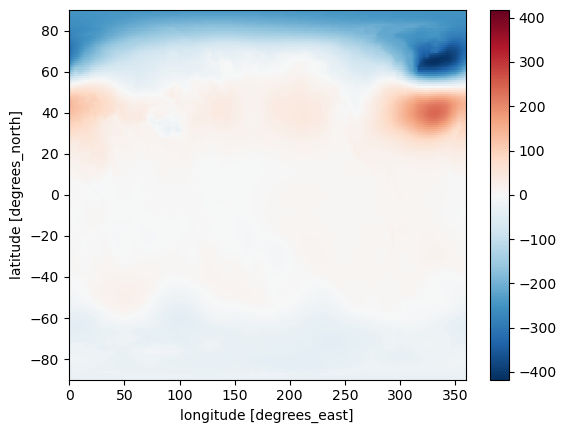

In [5]:
telec.regression.plot()